In [1]:
from os import listdir
from os.path import isfile, join
from signal import signal
import numpy
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import seaborn as sns
import pandas as pd
import networkx as nx



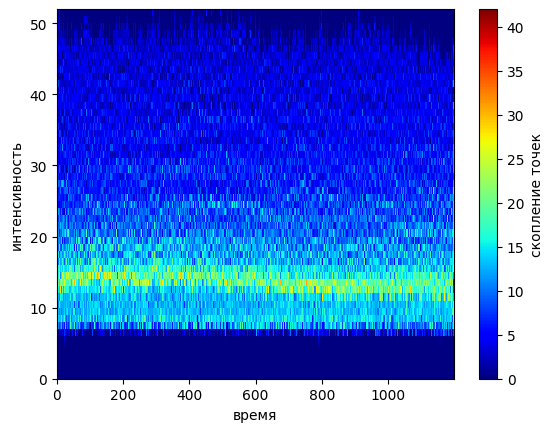

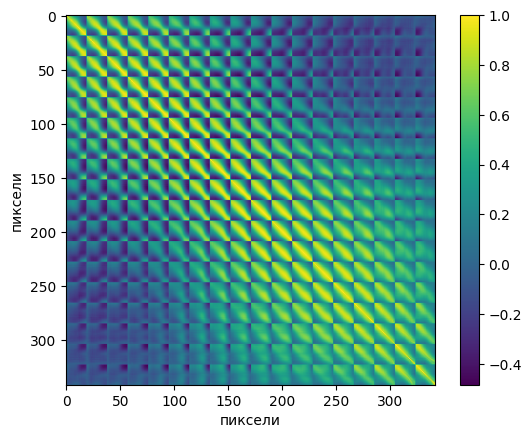

In [2]:
mypath='C:/Users/rusan/AppData/Local/Programs/Python/Python311/work/diplom/imagePage'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
arr3D = np.empty((1200,512,512), dtype='uint8')
for n in range(0, len(onlyfiles)):
    tmp = cv2.imread(join(mypath,onlyfiles[n]), 0)
    arrTmp = np.asarray(tmp)
    arrTmp = cv2.GaussianBlur(arrTmp, (19, 19),0)
    images[n] = arrTmp
    arr3D[n] = images[n]

cellOver = arr3D[:,35:53,120:139]

intens = cellOver.reshape(410400,)
time = []
for i in range(1200):
    for j in range(342):
        time.append(i)
xedges = range(1199)
yedges = range(53)
hist, x_edges, y_edges = np.histogram2d(time,intens)
pdf = PdfPages("2dhist2.pdf")
plt.hist2d(time,intens, bins=[xedges,yedges],cmap=plt.cm.jet)
plt.xlabel("время")
plt.ylabel("интенсивность")
plt.colorbar(label = "скопление точек")
pdf.savefig()
pdf.close()
plt.show()

VAL = np.vstack((time[:1200], intens[:1200]))
VAL
R_xy = np.corrcoef(VAL)
R_xy


res = []
#cellOver = np.transpose(cellOver, (0,2,1))

for i in range(18):
    for j in range(19):
        res.append(cellOver[:,i,j])

res = np.asarray(res)

#res = np.transpose(res)
#data = pd.DataFrame(res)
#
#data = data.corr()
#
#plt.matshow(data, interpolation='bilinear')
#plt.show()

corr_matrix=np.corrcoef(res)
pdf = PdfPages("corr1.pdf")
plt.imshow(corr_matrix, interpolation='bilinear')
plt.xlabel("пиксели")
plt.ylabel("пиксели")
plt.colorbar()
pdf.savefig()
pdf.close()
plt.show()


(18, 19)


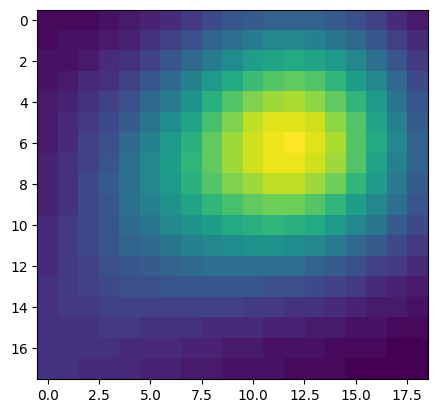

In [3]:
G = nx.Graph()
column_names = range(len(corr_matrix))
# Add nodes to the graph
G.add_nodes_from(column_names)
threshold = 0.8
# Add edges to the graph
for i, column_1 in enumerate(column_names):
    for j, column_2 in enumerate(column_names):
        if i < j and abs(corr_matrix[i][j]) > threshold:
            G.add_edge(column_1, column_2)

# Plot the graph
pos = nx.spring_layout(G)
#nx.draw(G, pos, with_labels=True)
#plt.show()

components = nx.connected_components(G)
componentArray = []
# Print the connected components
for component in components:
    if len(component) > 1:
        componentArray.append(component)

cellOver2 = cellOver[1,:,:]

plt.imshow(cellOver2)
print(cellOver2.shape)

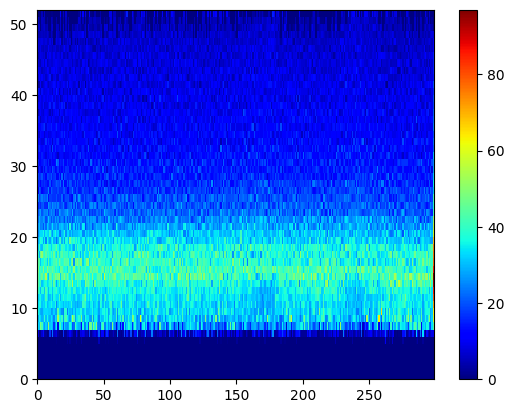

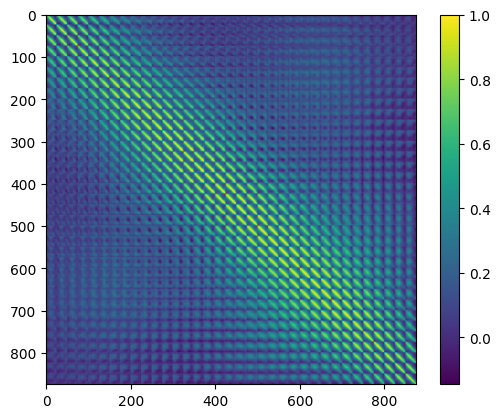

In [4]:
cellOver = arr3D[:300,293:328,90:115] #35*25
intens = cellOver.reshape(262500,)
time = []

for i in range(300):
    for j in range(875):
        time.append(i)
xedges = range(300)
yedges = range(53)
plt.hist2d(time,intens, bins=[xedges,yedges],cmap=plt.cm.jet)
plt.colorbar()
plt.show()

res = []
#cellOver = np.transpose(cellOver, (0,2,1))

for i in range(35):
    for j in range(25):
        res.append(cellOver[:,i,j])
res = np.asarray(res)
#res = np.transpose(res)
#data = pd.DataFrame(res)
#
#data = data.corr()
#
#plt.matshow(data, interpolation='bilinear')
#plt.show()

corr_matrix=np.corrcoef(res)
plt.imshow(corr_matrix, interpolation='bilinear')
plt.colorbar()
plt.show()



In [25]:

def create_correlation_graph(matrix, threshold):
    # Создаем пустой граф
    G = nx.Graph()
    
    # Получаем количество переменных
    num_variables = matrix.shape[0]
    
    # Добавляем вершины в граф
    for i in range(num_variables):
        G.add_node(i)
    
    # Добавляем ребра в граф, если коэффициент корреляции выше порога
    for i in range(num_variables):
        for j in range(i + 1, num_variables):
            if abs(matrix[i, j]) > threshold:
                G.add_edge(i, j)
    
    return G
print(G)
def find_connected_components(G):
    # Находим компоненты связности
    connected_components = nx.connected_components(G)
    
    return connected_components


# Создаем граф и находим компоненты связности
G = create_correlation_graph(corr_matrix, 0.8)
connected_components = find_connected_components(G)

# Выводим информацию о компонентах связности
print("Number of connected components:", len(list(connected_components)))
for component in list(connected_components):
    print("Component", component)
connected_components


Graph with 450 nodes and 6530 edges
Number of connected components: 2


<generator object connected_components at 0x000001F12FD01C60>

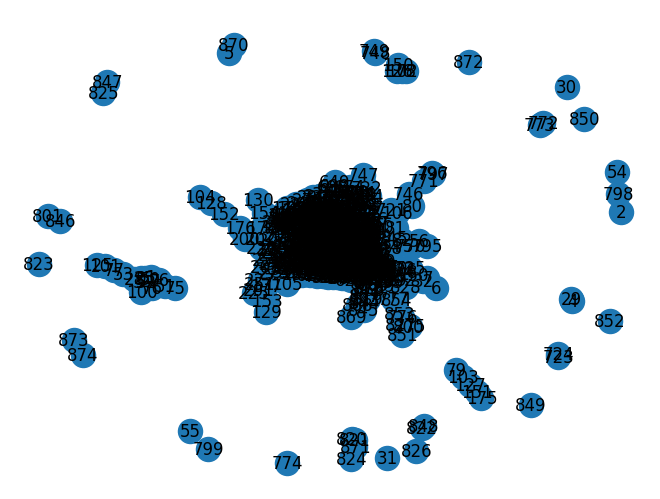

{0, 1, 3, 100, 101, 75, 76, 77, 50, 51, 52, 53, 25, 26, 27, 28, 125}
{2}
{4, 29}
{5}
{6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,

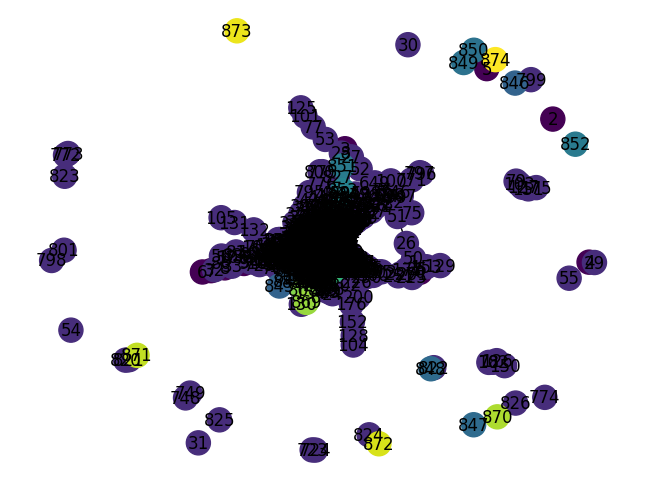

In [6]:
G = nx.Graph()
column_names = range(len(corr_matrix))
# Add nodes to the graph
G.add_nodes_from(column_names)
threshold = 0.8
# Add edges to the graph
for i, column_1 in enumerate(column_names):
    for j, column_2 in enumerate(column_names):
        if i < j and abs(corr_matrix[i][j]) > threshold:
            G.add_edge(column_1, column_2)

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

components = nx.connected_components(G)

# Print the connected components
for component in components:
    print(component)

components = nx.connected_components(G)

# Create a list of colors for each component
colors = [i for i, component in enumerate(components) for node in component]

# Plot the graph with nodes colored by component
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=colors, cmap='viridis', with_labels=True)
plt.show()

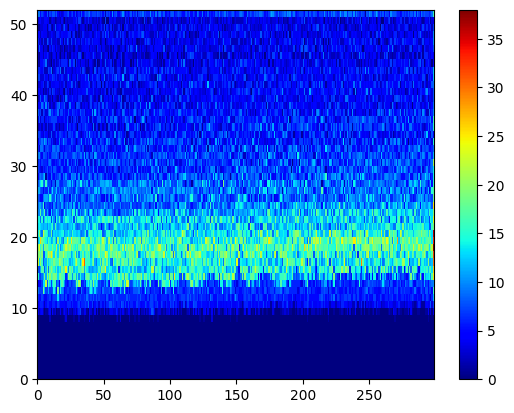

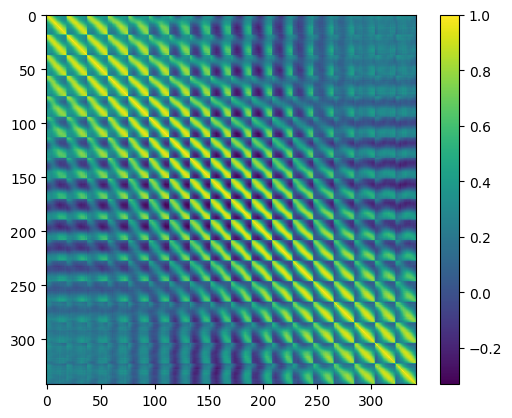

In [7]:
cellOver = arr3D[:300,115:133,453:472] #18*19
intens = cellOver.reshape(102600,)
time = []
for i in range(300):
    for j in range(342):
        time.append(i)
xedges = range(300)
yedges = range(53)
hist, x_edges, y_edges = np.histogram2d(time,intens)
plt.hist2d(time,intens, bins=[xedges,yedges],cmap=plt.cm.jet)
plt.colorbar()
plt.show()

res = []
#cellOver = np.transpose(cellOver, (0,2,1))
cellOver.shape
for i in range(18):
    for j in range(19):
        res.append(cellOver[:,i,j])
res = np.asarray(res)
#res = np.transpose(res)
#data = pd.DataFrame(res)
#
#data = data.corr()
#
#plt.matshow(data, interpolation='bilinear')
#plt.show()

corr_matrix=np.corrcoef(res)
plt.imshow(corr_matrix, interpolation='bilinear')
plt.colorbar()
plt.show()

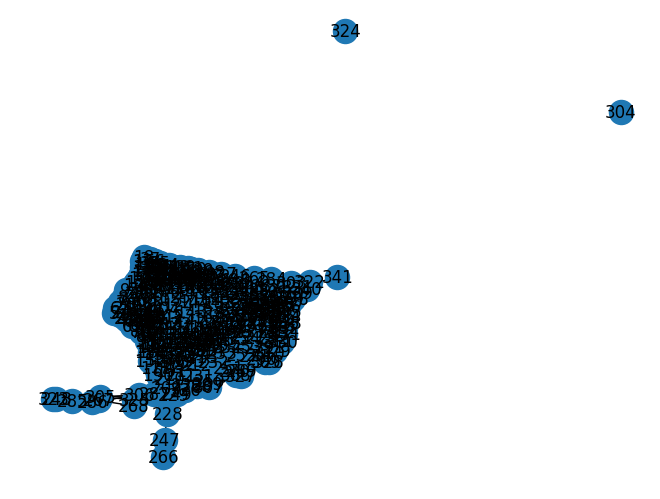

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [8]:
G = nx.Graph()
column_names = range(len(corr_matrix))
# Add nodes to the graph
G.add_nodes_from(column_names)
threshold = 0.8
# Add edges to the graph
for i, column_1 in enumerate(column_names):
    for j, column_2 in enumerate(column_names):
        if i < j and abs(corr_matrix[i][j]) > threshold:
            G.add_edge(column_1, column_2)

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

components = nx.connected_components(G)

# Print the connected components
for component in components:
    print(component)

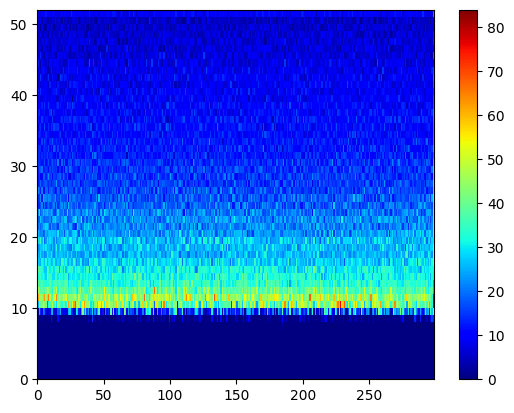

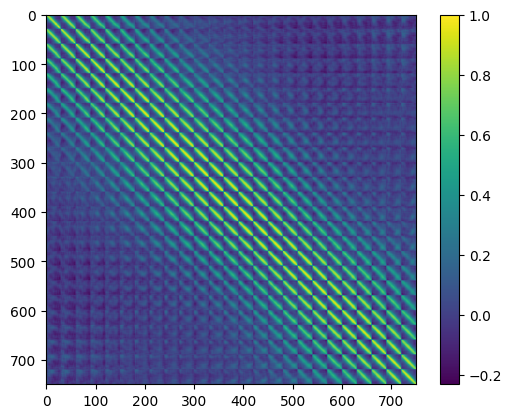

In [9]:
cellOver = arr3D[:300,90:115,350:380] 
intens = cellOver.reshape(225000,)
time = []
for i in range(300):
    for j in range(750):
        time.append(i)
xedges = range(300)
yedges = range(53)
hist, x_edges, y_edges = np.histogram2d(time,intens)
plt.hist2d(time,intens, bins=[xedges,yedges],cmap=plt.cm.jet)
plt.colorbar()
plt.show()

res = []
#cellOver = np.transpose(cellOver, (0,2,1))
cellOver.shape
for i in range(25):
    for j in range(30):
        res.append(cellOver[:,i,j])
res = np.asarray(res)
#res = np.transpose(res)
#data = pd.DataFrame(res)
#
#data = data.corr()
#
#plt.matshow(data, interpolation='bilinear')
#plt.show()

corr_matrix=np.corrcoef(res)
plt.imshow(corr_matrix, interpolation='bilinear')
plt.colorbar()
plt.show()



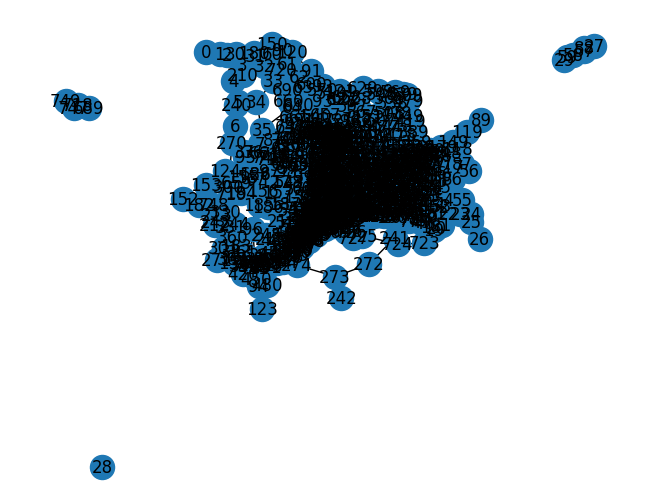

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 22

In [10]:
G = nx.Graph()
column_names = range(len(corr_matrix))
# Add nodes to the graph
G.add_nodes_from(column_names)
threshold = 0.8
# Add edges to the graph
for i, column_1 in enumerate(column_names):
    for j, column_2 in enumerate(column_names):
        if i < j and abs(corr_matrix[i][j]) > threshold:
            G.add_edge(column_1, column_2)

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

components = nx.connected_components(G)

# Print the connected components
for component in components:
    print(component)

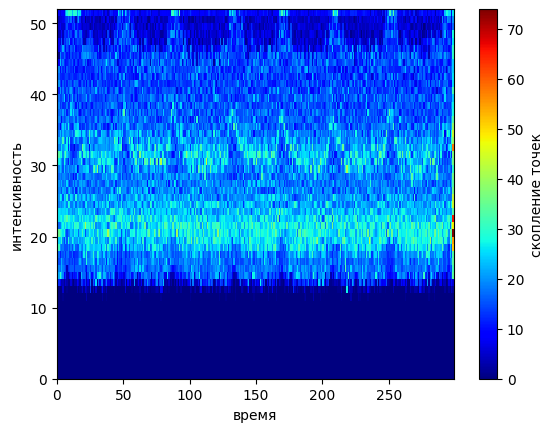

(300, 20, 35)


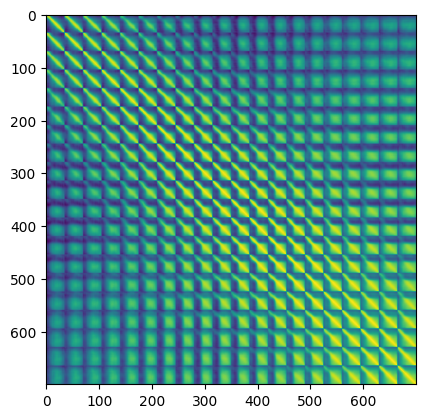

(20, 35)


array([[20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 18, 19, 19, 19, 19,
        19, 19, 18, 18, 18, 18, 17, 16, 15, 15, 14, 13, 13, 13, 13, 13,
        14, 14, 14],
       [21, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 20, 20,
        20, 20, 20, 19, 19, 18, 18, 17, 16, 15, 14, 14, 14, 13, 13, 14,
        14, 14, 14],
       [22, 23, 24, 24, 25, 25, 25, 25, 25, 25, 25, 24, 24, 23, 22, 22,
        21, 21, 21, 20, 20, 19, 19, 18, 17, 16, 15, 15, 14, 14, 14, 14,
        14, 15, 15],
       [23, 24, 26, 27, 28, 29, 29, 30, 30, 29, 29, 28, 27, 26, 25, 24,
        23, 23, 22, 22, 21, 21, 20, 19, 18, 17, 16, 16, 15, 15, 15, 15,
        15, 15, 15],
       [24, 25, 27, 29, 31, 33, 34, 35, 35, 35, 34, 33, 32, 30, 28, 27,
        26, 25, 24, 23, 23, 23, 22, 21, 20, 19, 18, 17, 16, 16, 15, 15,
        15, 15, 15],
       [24, 26, 29, 31, 34, 37, 39, 40, 41, 41, 40, 38, 36, 34, 32, 30,
        28, 27, 26, 26, 25, 25, 24, 23, 22, 21, 19, 18, 17, 17, 16, 16,
        16, 15, 15],
       [24

In [37]:
cellOver = arr3D[:300,275:295,160:195] 
intens = cellOver.reshape(210000,)
time = []
for i in range(300):
    for j in range(700):
        time.append(i)
xedges = range(300)
yedges = range(53)
hist, x_edges, y_edges = np.histogram2d(time,intens)

pdf = PdfPages("2dhist22.pdf")
plt.hist2d(time,intens, bins=[xedges,yedges],cmap=plt.cm.jet)
plt.xlabel("время")
plt.ylabel("интенсивность")
plt.colorbar(label = "скопление точек")
pdf.savefig()
pdf.close()
plt.show()

res = []
#cellOver = np.transpose(cellOver, (0,2,1))
print(cellOver.shape)
for i in range(20):
    for j in range(35):
        res.append(cellOver[:,i,j])
res = np.asarray(res)
#res = np.transpose(res)
#data = pd.DataFrame(res)
#
#data = data.corr()
#
#plt.matshow(data, interpolation='bilinear')
#plt.show()

corr_matrix=np.corrcoef(res)
plt.imshow(corr_matrix, interpolation='bilinear')

plt.show()
cellOverNew111 = cellOver[0, :, :].copy()
print(cellOverNew111.shape)
cellOverNew111.astype('int32')

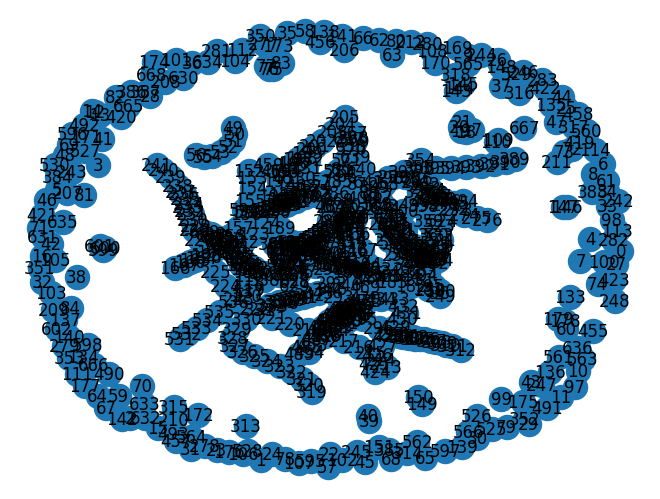

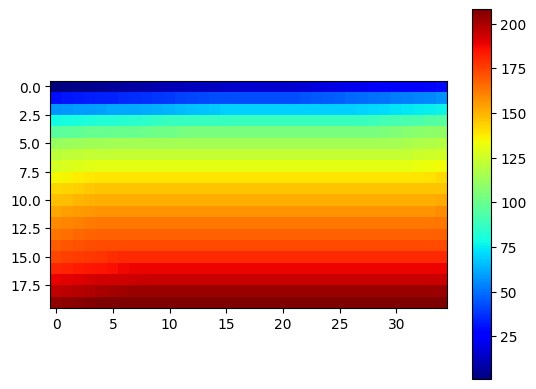

[[  1   2   3   4   5   6   7   8   9  10  11  12  13  13  13  14  15  16
   16  16  16  16  17  18  19  20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  34  35  36  37  38  39  40  41  42  43  43  43  43
   43  43  43  43  44  45  46  47  48  49  50  51  52  53  54  55  56]
 [ 57  58  59  59  60  61  61  61  62  63  64  65  66  67  68  69  69  69
   69  69  69  69  69  69  69  69  69  70  71  72  73  74  75  76  77]
 [ 78  79  80  81  82  82  83  84  85  86  87  87  87  87  87  87  88  88
   88  88  88  88  88  88  88  88  88  88  89  90  91  92  93  94  95]
 [ 96  97  98  99  99  99 100 100 101 102 102 103 104 104 104 104 104 104
  104 104 104 104 104 104 104 104 104 104 104 105 106 107 108 109 110]
 [111 112 113 114 114 115 115 115 115 115 115 115 115 115 115 115 115 115
  115 115 115 115 115 115 115 115 115 115 115 115 115 116 117 118 119]
 [120 121 122 123 123 123 123 123 123 123 123 123 123 123 123 123 123 123
  123 123 123 123 123 123 123 123 123 123 123 123 123 12

dtype('int32')

In [48]:
cellOverNew111 = cellOverNew111.astype('int32')
G = nx.Graph()
column_names = range(len(corr_matrix))
# Add nodes to the graph
G.add_nodes_from(column_names)
threshold = 0.93
# Add edges to the graph
for i, column_1 in enumerate(column_names): 
    coordI = [i // 35, i - i// 35 * 35]
    for j, column_2 in enumerate(column_names):
        coordJ = [j // 35, j - j// 35 * 35]
        evclideanDist = np.sqrt((coordI[0] - coordJ[0])**2+ (coordI[1] - coordJ[1])**2)
        if abs(i-j) <= 5*evclideanDist and i < j and corr_matrix[i][j] > threshold:
            G.add_edge(column_1, column_2)

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

components = nx.connected_components(G)
arrForGraphOut = []
# Print the connected components
componentsCopy = components
x = list(componentsCopy)
for component in x:
    #print(component)
    tmp = []
    for i in component:
        tmp.append([i // 35, i - i// 35 * 35])
    arrForGraphOut.append(tmp)
curr = 0
for i in arrForGraphOut:
    curr += 1
    for j in i:
        cellOverNew111[j[0], j[1]] = curr 
plt.imshow(cellOverNew111, cmap = 'jet')
plt.colorbar()
plt.show()

#plt.imshow(cellOver[0, :, :])
#plt.colorbar()
#plt.show()
print(cellOverNew111)
cellOverNew111.dtype





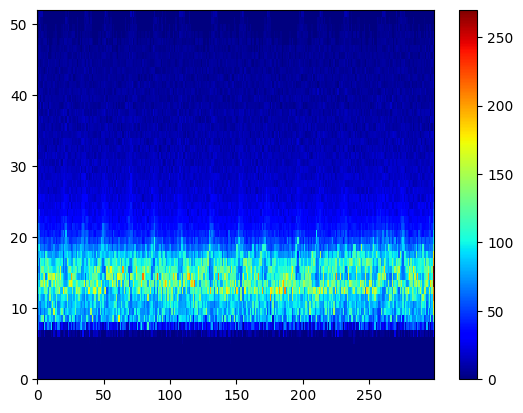

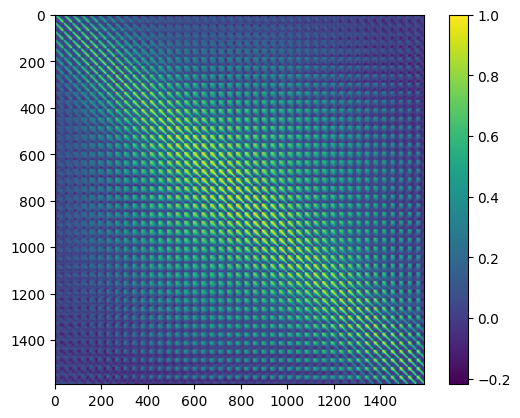

In [34]:
cellOver = arr3D[:300,70:113,475:512] 
intens = cellOver.reshape(477300,)
time = []
for i in range(300):
    for j in range(1591):
        time.append(i)
xedges = range(300)
yedges = range(53)
hist, x_edges, y_edges = np.histogram2d(time,intens)
plt.hist2d(time,intens, bins=[xedges,yedges],cmap=plt.cm.jet)
plt.colorbar()
plt.show()

res = []
#cellOver = np.transpose(cellOver, (0,2,1))
cellOver.shape
for i in range(43):
    for j in range(37):
        res.append(cellOver[:,i,j])
res = np.asarray(res)
#res = np.transpose(res)
#data = pd.DataFrame(res)
#
#data = data.corr()
#
#plt.matshow(data, interpolation='bilinear')
#plt.show()

corr_matrix=np.corrcoef(res)
plt.imshow(corr_matrix, interpolation='bilinear')
plt.colorbar()
plt.show()
res.shape

cellOverNew112 = cellOver[0, :, :].copy()

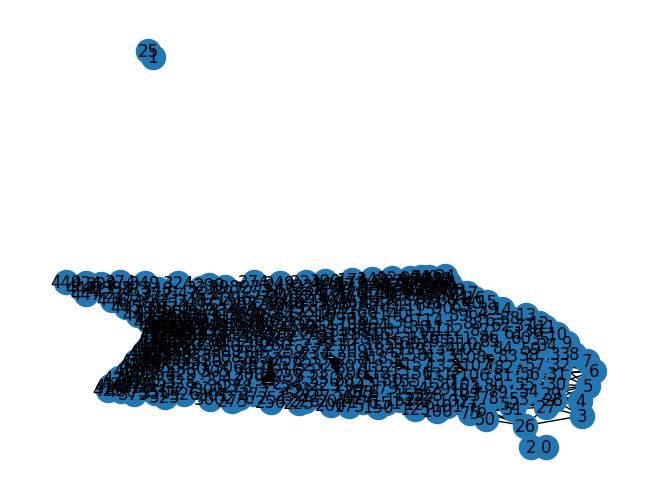

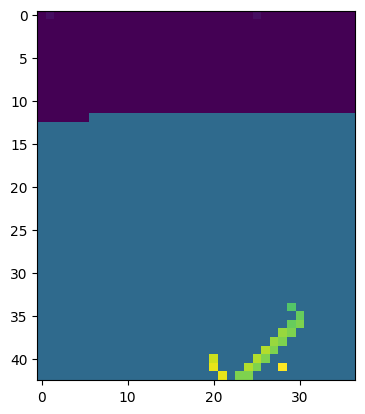

AttributeError: 'list' object has no attribute 'dtype'

In [27]:
G = nx.Graph()
column_names = range(len(corr_matrix))
# Add nodes to the graph
G.add_nodes_from(column_names)
threshold = 0.8
# Add edges to the graph
for i, column_1 in enumerate(column_names):
    for j, column_2 in enumerate(column_names):
        if i < j and abs(corr_matrix[i][j]) > threshold:
            G.add_edge(column_1, column_2)

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()


components = nx.connected_components(G)
arrForGraphOut = []
# Print the connected components
componentsCopy = components
x = list(componentsCopy)
for component in x:
    #print(component)
    tmp = []
    for i in component:
        tmp.append([i // 37, i - i// 37 * 37])
    arrForGraphOut.append(tmp)
curr = 1
for i in arrForGraphOut:
    curr += 5
    for j in i:
        cellOverNew112[j[0], j[1]] = curr 
plt.imshow(cellOverNew112)
#plt.colorbar()
plt.show()
arrForGraphOut.dtype


In [15]:
len(x)

27

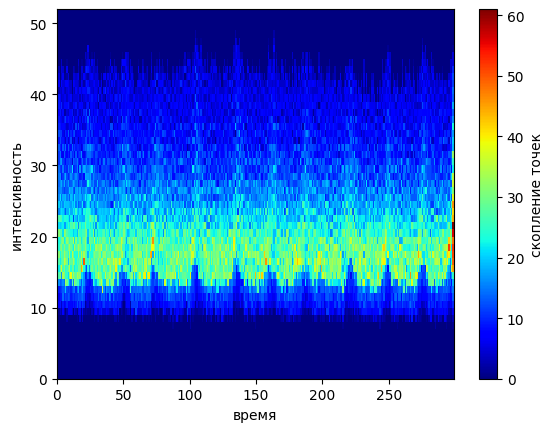

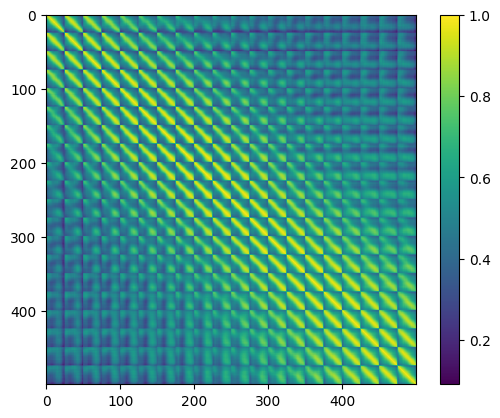

In [16]:
cellOver = arr3D[:300,260:280,435:460] 
intens = cellOver.reshape(150000,)
time = []
for i in range(300):
    for j in range(500):
        time.append(i)
xedges = range(300)
yedges = range(53)
hist, x_edges, y_edges = np.histogram2d(time,intens)
pdf = PdfPages("2dhist3.pdf")
plt.hist2d(time,intens, bins=[xedges,yedges],cmap=plt.cm.jet)
plt.xlabel("время")
plt.ylabel("интенсивность")
plt.colorbar(label = "скопление точек")
pdf.savefig()
pdf.close()
plt.show()



res = []
#cellOver = np.transpose(cellOver, (0,2,1))
cellOver.shape
for i in range(20):
    for j in range(25):
        res.append(cellOver[:,i,j])
res = np.asarray(res)
#res = np.transpose(res)
#data = pd.DataFrame(res)
#
#data = data.corr()
#
#plt.matshow(data, interpolation='bilinear')
#plt.show()

corr_matrix=np.corrcoef(res)
plt.imshow(corr_matrix, interpolation='bilinear')
plt.colorbar()
plt.show()

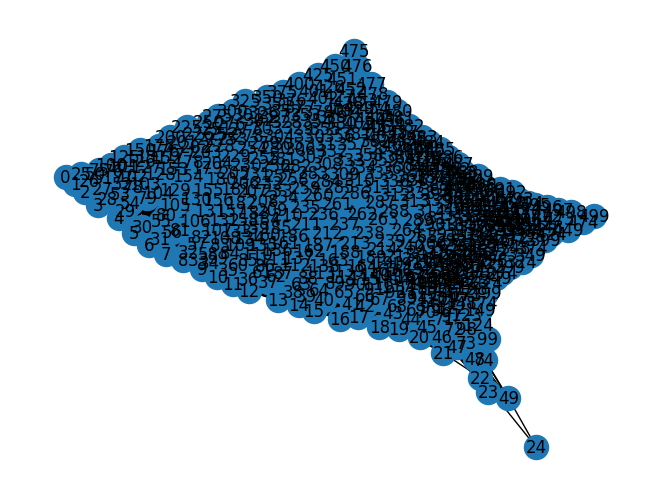

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [17]:
G = nx.Graph()
column_names = range(len(corr_matrix))
# Add nodes to the graph
G.add_nodes_from(column_names)
threshold = 0.8
# Add edges to the graph
for i, column_1 in enumerate(column_names):
    for j, column_2 in enumerate(column_names):
        if i < j and abs(corr_matrix[i][j]) > threshold:
            G.add_edge(column_1, column_2)

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

components = nx.connected_components(G)

# Print the connected components
for component in components:
    print(component)

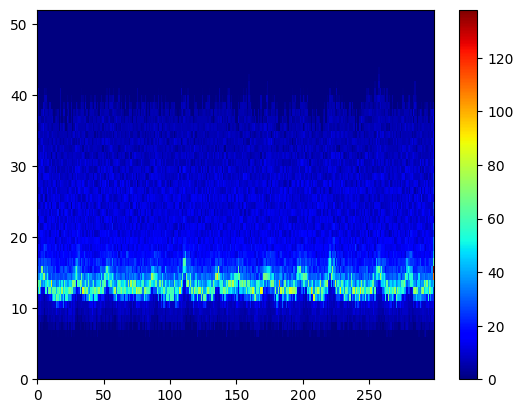

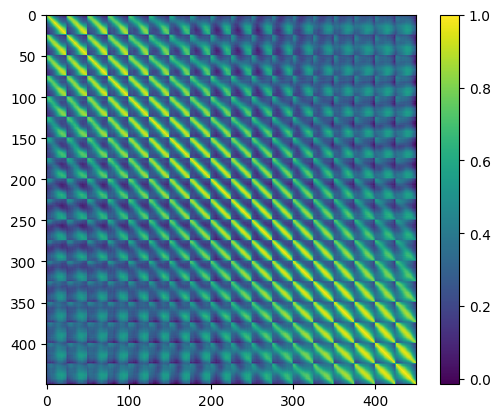

In [18]:
cellOver = arr3D[:300,400:418,25:50] 
intens = cellOver.reshape(135000,)
time = []
for i in range(300):
    for j in range(450):
        time.append(i)
xedges = range(300)
yedges = range(53)
hist, x_edges, y_edges = np.histogram2d(time,intens)
plt.hist2d(time,intens, bins=[xedges,yedges],cmap=plt.cm.jet)
plt.colorbar()
plt.show()

res = []
#cellOver = np.transpose(cellOver, (0,2,1))
cellOver.shape
for i in range(18):
    for j in range(25):
        res.append(cellOver[:,i,j])
res = np.asarray(res)
#res = np.transpose(res)
#data = pd.DataFrame(res)
#
#data = data.corr()
#
#plt.matshow(data, interpolation='bilinear')
#plt.show()

corr_matrix=np.corrcoef(res)
plt.imshow(corr_matrix, interpolation='bilinear')
plt.colorbar()
plt.show()

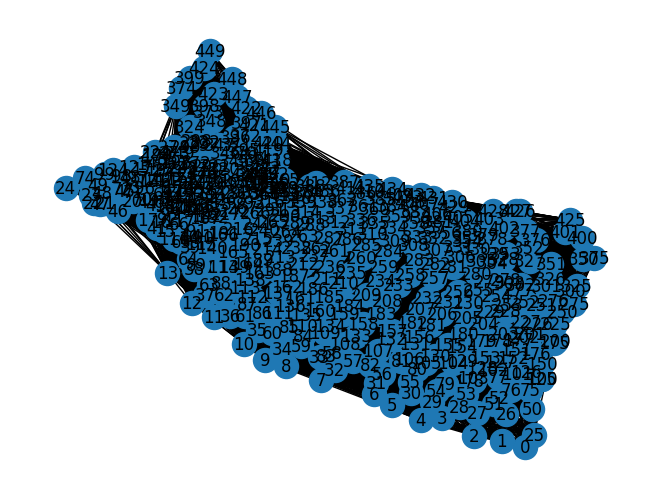

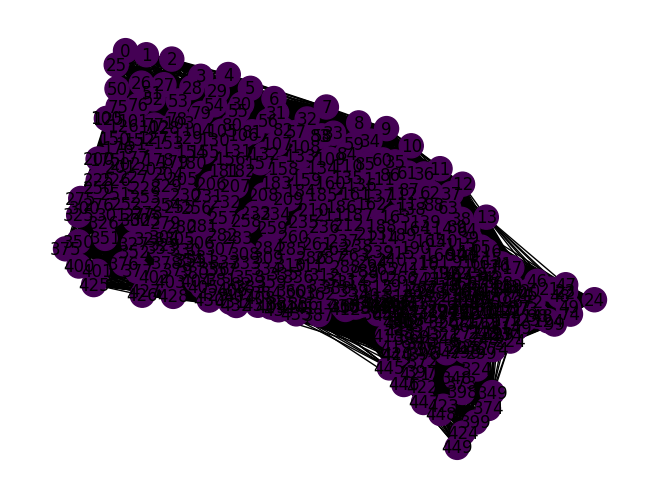

Graph with 450 nodes and 29973 edges


In [19]:
G = nx.Graph()
column_names = range(len(corr_matrix))
# Add nodes to the graph
G.add_nodes_from(column_names)
threshold = 0.5
# Add edges to the graph
for i, column_1 in enumerate(column_names):
    for j, column_2 in enumerate(column_names):
        if i < j and abs(corr_matrix[i][j]) > threshold:
            G.add_edge(column_1, column_2)

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

components = nx.connected_components(G)
#print(len(list(components)))
# Create a list of colors for each component
colors = [i for i, component in enumerate(components) for node in component]
# Plot the graph with nodes colored by component
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=colors, cmap='viridis', with_labels=True)
plt.show()
print(G)

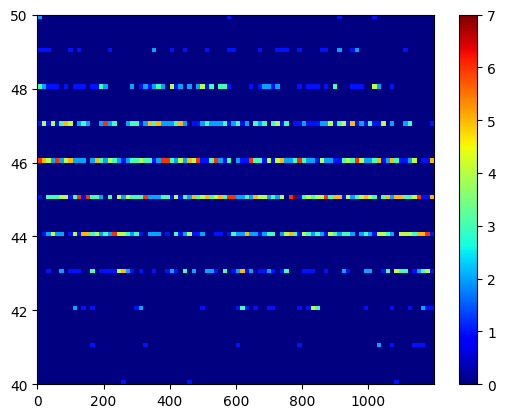

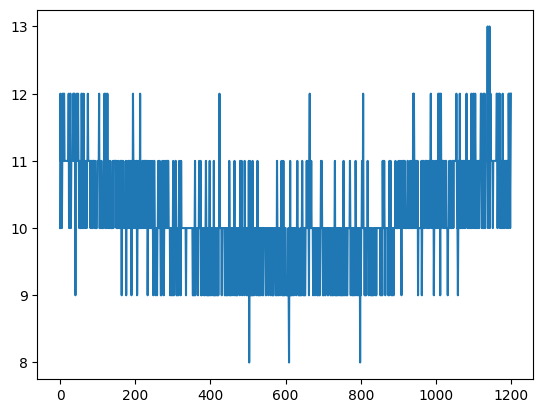

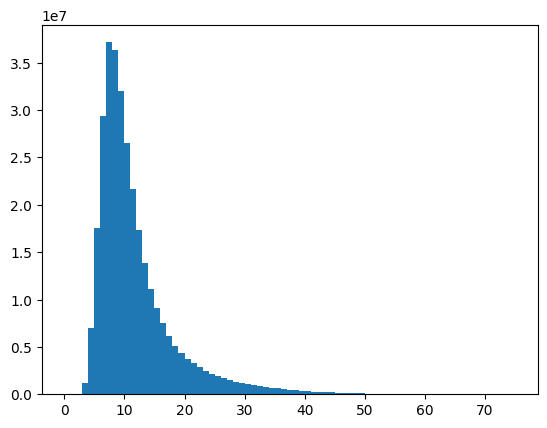

In [20]:
cellOver = arr3D[:,35:53,120:139]
signal = cellOver[:,5,12]
signal3 = cellOver[0:1200,2,3]
cell1D = []
time = []
timer = range(1200)
#m = np.delete(signal, np.where(signal > 100)[0])
#for cell in range(int(m.shape[0])):
#            cell1D.append(m[cell])
#            time.append(cell)
#plt.hist2d(time,cell1D, bins = 90, cmap=plt.cm.jet)
#plt.colorbar()
#plt.show()
#plt.plot(cell1D)
#plt.show()
for cell in range(1200):
            cell1D.append(signal3[cell])


plt.hist2d(timer,signal, bins = 90, cmap=plt.cm.jet)
plt.colorbar()
plt.show()
plt.plot(signal3)
plt.show()
plt.hist(arr3D.ravel(),75, [0,75])
plt.show()
#cell1D = np.empty(342,)
#for i in range(18):
#    for j in range(19):
#        t = cellOver[:, i,j]
#        for x in t:
#            m = np.delete(t, np.where(t > 100)[0])
#            print(np.where(t > 100)[0])
#            break 

